import needed libreries 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.core.indexes.period import Index
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

import the dataset

In [2]:
data = pd.read_csv("dataset_telecom.csv",encoding='latin-1')

In [3]:
data

,id_client,nb_jours_abonne,duree_appel_jour(minutes),nb_appel_jour,cout_appel_jour,duree_appel_soiree(minutes),nb_appel_soiree,cout_appel_soiree,duree_appel_nuit(minutes),nb_appel_nuit,cout_appel_nuit,duree_appel_inter(minutes),nb_appel_inter,cout_appel_inter,active_msg_vocaux,nb_msg_vocaux,nb_reclamation,churn
0,382-4657,128.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,yes,25,1.0,False.
1,371-7191,107.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,yes,26,1.0,False.
2,358-1921,137.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,no,0,0.0,False.
3,375-9999,84.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,no,0,2.0,False.
4,330-6626,75.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,no,0,3.0,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,365-8751,50.0,235.7,127.0,40.07,223.0,126.0,18.96,297.5,116.0,13.39,9.9,5.0,2.67,yes,40,2.0,False.
4996,334-9736,152.0,184.2,90.0,31.31,256.8,73.0,21.83,213.6,113.0,9.61,14.7,2.0,3.97,no,0,3.0,True.
4997,333-6861,61.0,140.6,89.0,23.90,172.8,128.0,14.69,212.4,97.0,9.56,13.6,4.0,3.67,no,0,1.0,False.
4998,394-2206,109.0,188.8,67.0,32.10,171.7,92.0,14.59,224.4,89.0,10.10,8.5,6.0,2.30,no,0,0.0,False.


# Data cleaning process

string values encoding

In [4]:
data['churn'].fillna(data['churn'].mode().iloc[0],inplace=True)

In [5]:
label_encoder = LabelEncoder()
print(data.shape)
data['active_msg_vocaux'] = label_encoder.fit_transform(data['active_msg_vocaux'])
data['churn'] = label_encoder.fit_transform(data['churn'])

(5000, 18)


drop the id column

In [6]:
data=data.iloc[:,1:]

In [7]:
data_clean=data.dropna()

In [8]:
data

,nb_jours_abonne,duree_appel_jour(minutes),nb_appel_jour,cout_appel_jour,duree_appel_soiree(minutes),nb_appel_soiree,cout_appel_soiree,duree_appel_nuit(minutes),nb_appel_nuit,cout_appel_nuit,duree_appel_inter(minutes),nb_appel_inter,cout_appel_inter,active_msg_vocaux,nb_msg_vocaux,nb_reclamation,churn
0,128.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1,25,1.0,0
1,107.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1,26,1.0,0
2,137.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0,0,0.0,0
3,84.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,0,0,2.0,0
4,75.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,0,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,50.0,235.7,127.0,40.07,223.0,126.0,18.96,297.5,116.0,13.39,9.9,5.0,2.67,1,40,2.0,0
4996,152.0,184.2,90.0,31.31,256.8,73.0,21.83,213.6,113.0,9.61,14.7,2.0,3.97,0,0,3.0,1
4997,61.0,140.6,89.0,23.90,172.8,128.0,14.69,212.4,97.0,9.56,13.6,4.0,3.67,0,0,1.0,0
4998,109.0,188.8,67.0,32.10,171.7,92.0,14.59,224.4,89.0,10.10,8.5,6.0,2.30,0,0,0.0,0


In [9]:
data[data['nb_jours_abonne']==1]


,nb_jours_abonne,duree_appel_jour(minutes),nb_appel_jour,cout_appel_jour,duree_appel_soiree(minutes),nb_appel_soiree,cout_appel_soiree,duree_appel_nuit(minutes),nb_appel_nuit,cout_appel_nuit,duree_appel_inter(minutes),nb_appel_inter,cout_appel_inter,active_msg_vocaux,nb_msg_vocaux,nb_reclamation,churn
923,1.0,144.8,107.0,24.62,112.5,66.0,9.56,218.7,79.0,9.84,13.8,3.0,3.73,0,0,1.0,0
1409,1.0,183.1,95.0,31.13,232.6,110.0,19.77,248.3,110.0,11.17,8.4,2.0,2.27,1,30,0.0,0
1490,1.0,196.1,107.0,33.34,296.5,82.0,25.20,211.5,91.0,9.52,7.0,2.0,1.89,0,0,1.0,0
1838,1.0,208.0,115.0,35.36,185.0,113.0,15.73,177.7,144.0,8.00,8.1,9.0,2.19,1,26,1.0,0
2423,1.0,123.8,113.0,21.05,236.2,77.0,20.08,73.2,81.0,3.29,3.7,2.0,1.00,0,0,0.0,0
2475,1.0,175.2,74.0,29.78,151.7,79.0,12.89,230.5,109.0,10.37,5.3,3.0,1.43,0,0,1.0,0
2879,1.0,146.6,68.0,24.92,172.8,67.0,14.69,173.8,113.0,7.82,10.0,2.0,2.70,1,26,1.0,0
2960,1.0,182.1,106.0,30.96,134.9,106.0,11.47,152.3,75.0,6.85,10.0,3.0,2.70,0,0,5.0,1
3848,1.0,69.7,84.0,11.85,250.4,79.0,21.28,230.2,122.0,10.36,8.3,3.0,2.24,1,26,2.0,0
4174,1.0,241.5,114.0,41.06,195.2,94.0,16.59,201.6,93.0,9.07,14.1,3.0,3.81,0,0,3.0,0


In [10]:
data[data['nb_jours_abonne']==1].sum()

nb_jours_abonne                  11.00
duree_appel_jour(minutes)      1865.90
nb_appel_jour                  1064.00
cout_appel_jour                 317.22
duree_appel_soiree(minutes)    2234.00
nb_appel_soiree                 996.00
cout_appel_soiree               189.89
duree_appel_nuit(minutes)      2131.70
nb_appel_nuit                  1149.00
cout_appel_nuit                  95.92
duree_appel_inter(minutes)       99.80
nb_appel_inter                   38.00
cout_appel_inter                 26.96
active_msg_vocaux                 4.00
nb_msg_vocaux                   108.00
nb_reclamation                   15.00
churn                             1.00
dtype: float64

In [11]:
data.sample(10)

,nb_jours_abonne,duree_appel_jour(minutes),nb_appel_jour,cout_appel_jour,duree_appel_soiree(minutes),nb_appel_soiree,cout_appel_soiree,duree_appel_nuit(minutes),nb_appel_nuit,cout_appel_nuit,duree_appel_inter(minutes),nb_appel_inter,cout_appel_inter,active_msg_vocaux,nb_msg_vocaux,nb_reclamation,churn
79,70.0,170.2,98.0,28.93,155.2,102.0,13.19,228.6,76.0,10.29,15.0,2.0,4.05,0,0,1.0,0
3480,60.0,197.0,130.0,33.49,219.2,105.0,18.63,102.8,113.0,4.63,12.6,4.0,3.40,0,0,1.0,0
3566,106.0,223.3,97.0,37.96,212.5,131.0,18.06,154.6,149.0,6.96,11.6,2.0,3.13,1,27,1.0,0
1441,172.0,274.9,102.0,46.73,186.6,118.0,15.86,245.0,123.0,11.03,8.8,2.0,2.38,1,47,1.0,0
3855,18.0,180.2,115.0,30.63,83.4,114.0,7.09,245.3,111.0,11.04,11.9,6.0,3.21,0,0,1.0,0
2627,86.0,150.8,85.0,25.64,295.9,88.0,25.15,247.2,104.0,11.12,12.5,1.0,3.38,0,0,1.0,0
537,190.0,166.5,93.0,28.31,183.0,92.0,15.56,121.0,102.0,5.44,8.5,3.0,2.30,1,22,0.0,0
4128,130.0,140.9,68.0,23.95,217.5,109.0,18.49,123.6,96.0,5.56,13.6,4.0,3.67,0,0,3.0,0
3711,127.0,155.8,91.0,26.49,103.7,85.0,8.81,117.2,125.0,5.27,8.6,3.0,2.32,0,0,2.0,0
760,128.0,187.3,84.0,31.84,270.8,95.0,23.02,206.4,68.0,9.29,10.1,5.0,2.73,0,0,1.0,0


check the null values

In [12]:
data.isnull().sum()

nb_jours_abonne                10
duree_appel_jour(minutes)       0
nb_appel_jour                   7
cout_appel_jour                21
duree_appel_soiree(minutes)     0
nb_appel_soiree                 6
cout_appel_soiree               0
duree_appel_nuit(minutes)       0
nb_appel_nuit                  11
cout_appel_nuit                 0
duree_appel_inter(minutes)      0
nb_appel_inter                 12
cout_appel_inter                0
active_msg_vocaux               0
nb_msg_vocaux                   0
nb_reclamation                 12
churn                           0
dtype: int64

in this cell we are going to  change null values of ‘nb_app_jour’ par E(nb/duree)*nb

In [13]:
x=data_clean['duree_appel_jour(minutes)']
y=data_clean['nb_appel_jour']
Avg_duree_per_app=(x/y).mean()
I=data['nb_appel_jour'][data['nb_appel_jour'].isnull()].index
print(I.shape)
data['nb_appel_jour'].__setitem__(I,data['duree_appel_jour(minutes)'].__getitem__(I)/Avg_duree_per_app)

(7,)


C:\Users\Wajih\AppData\Local\Temp\ipykernel_11152\2812907389.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nb_appel_jour'].__setitem__(I,data['duree_appel_jour(minutes)'].__getitem__(I)/Avg_duree_per_app)


In [14]:
data['nb_appel_jour'].value_counts()

102.000000    113
105.000000    110
95.000000     108
94.000000     104
97.000000     104
             ... 
112.719065      1
109.641049      1
143.923778      1
36.000000       1
46.000000       1
Name: nb_appel_jour, Length: 130, dtype: int64

now we do the same for nuit soiree

In [15]:
x=data_clean['duree_appel_nuit(minutes)']
y=data_clean['nb_appel_nuit']
Avg_duree_per_app_nuit=(x/y).mean()

I=data['nb_appel_nuit'][data['nb_appel_nuit'].isnull()].index
data['nb_appel_nuit'].__setitem__(I,data['duree_appel_nuit(minutes)'].__getitem__(I)/Avg_duree_per_app_nuit)

C:\Users\Wajih\AppData\Local\Temp\ipykernel_11152\819878149.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nb_appel_nuit'].__setitem__(I,data['duree_appel_nuit(minutes)'].__getitem__(I)/Avg_duree_per_app_nuit)


In [16]:
data['nb_appel_nuit'].value_counts()

105.000000    110
102.000000    109
100.000000    108
104.000000    106
99.000000     105
             ... 
33.000000       1
81.199139       1
166.000000      1
72.033804       1
0.000000        1
Name: nb_appel_nuit, Length: 142, dtype: int64

In [17]:
x=data_clean['duree_appel_soiree(minutes)']
y=data_clean['nb_appel_soiree']
Avg_duree_per_app_soiree=(x/y).mean()

I=data['nb_appel_soiree'][data['nb_appel_soiree'].isnull()].index
print(I)
for i in I:
  data['nb_appel_soiree'].iloc[i]=data['duree_appel_soiree(minutes)'].iloc[i]/Avg_duree_per_app_soiree

Int64Index([260, 754, 1667, 2223, 2802, 3443], dtype='int64')


C:\Users\Wajih\AppData\Local\Temp\ipykernel_11152\3925469622.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nb_appel_soiree'].iloc[i]=data['duree_appel_soiree(minutes)'].iloc[i]/Avg_duree_per_app_soiree


In [18]:
data['nb_appel_soiree'].value_counts()

91.000000     110
97.000000     110
105.000000    109
94.000000     106
103.000000    106
             ... 
12.000000       1
156.000000      1
82.057979       1
36.000000       1
38.000000       1
Name: nb_appel_soiree, Length: 132, dtype: int64

In [19]:
avg=data['nb_jours_abonne'].mean()
I=data[data['nb_jours_abonne'].isnull()].index
print(print(I))
for i in I:
  data['nb_jours_abonne'].iloc[i]=avg

Int64Index([359, 374, 460, 586, 1311, 1591, 2368, 3367, 4312, 4382], dtype='int64')
None


C:\Users\Wajih\AppData\Local\Temp\ipykernel_11152\3963454278.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nb_jours_abonne'].iloc[i]=avg


In [20]:
avg=data['nb_reclamation'].mean()
I=data[data['nb_reclamation'].isnull()].index
for i in I:
  data['nb_reclamation'].iloc[i]=avg

C:\Users\Wajih\AppData\Local\Temp\ipykernel_11152\3158618482.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nb_reclamation'].iloc[i]=avg


In [21]:
data['duree_appel_inter(minutes)'].isnull().sum()

0

In [22]:
data_clean.isnull().sum()

nb_jours_abonne                0
duree_appel_jour(minutes)      0
nb_appel_jour                  0
cout_appel_jour                0
duree_appel_soiree(minutes)    0
nb_appel_soiree                0
cout_appel_soiree              0
duree_appel_nuit(minutes)      0
nb_appel_nuit                  0
cout_appel_nuit                0
duree_appel_inter(minutes)     0
nb_appel_inter                 0
cout_appel_inter               0
active_msg_vocaux              0
nb_msg_vocaux                  0
nb_reclamation                 0
churn                          0
dtype: int64

In [23]:
x=data_clean['duree_appel_inter(minutes)'][data_clean['duree_appel_inter(minutes)']!=0]
y=data_clean['nb_appel_inter'][data_clean['nb_appel_inter']!=0]
Avg_duree_per_app_inter=(y/x).mean()
I=data['nb_appel_inter'][data['nb_appel_inter'].isnull()].index
for i in I:
  data['nb_appel_inter'].iloc[i]=data['duree_appel_inter(minutes)'].iloc[i]*Avg_duree_per_app_inter

C:\Users\Wajih\AppData\Local\Temp\ipykernel_11152\1868993062.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['nb_appel_inter'].iloc[i]=data['duree_appel_inter(minutes)'].iloc[i]*Avg_duree_per_app_inter


In [24]:
d=(data_clean['cout_appel_jour']/data_clean['duree_appel_jour(minutes)'])
print(d.min(),d.max())

0.1692307692307692 0.17051282051282052


In [25]:
cout_per_min_avg=(data_clean['cout_appel_jour']/data_clean['duree_appel_jour(minutes)']).mean()
I=data['cout_appel_jour'][data['cout_appel_jour'].isnull()].index
for i in I:
  data['cout_appel_jour'].iloc[i]=cout_per_min_avg*data['duree_appel_jour(minutes)'].iloc[i]

C:\Users\Wajih\AppData\Local\Temp\ipykernel_11152\197206400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cout_appel_jour'].iloc[i]=cout_per_min_avg*data['duree_appel_jour(minutes)'].iloc[i]


In [26]:
data.isnull().sum()

nb_jours_abonne                0
duree_appel_jour(minutes)      0
nb_appel_jour                  0
cout_appel_jour                0
duree_appel_soiree(minutes)    0
nb_appel_soiree                0
cout_appel_soiree              0
duree_appel_nuit(minutes)      0
nb_appel_nuit                  0
cout_appel_nuit                0
duree_appel_inter(minutes)     0
nb_appel_inter                 0
cout_appel_inter               0
active_msg_vocaux              0
nb_msg_vocaux                  0
nb_reclamation                 0
churn                          0
dtype: int64

In [27]:
data[data['churn']==2]

,nb_jours_abonne,duree_appel_jour(minutes),nb_appel_jour,cout_appel_jour,duree_appel_soiree(minutes),nb_appel_soiree,cout_appel_soiree,duree_appel_nuit(minutes),nb_appel_nuit,cout_appel_nuit,duree_appel_inter(minutes),nb_appel_inter,cout_appel_inter,active_msg_vocaux,nb_msg_vocaux,nb_reclamation,churn


In [28]:
data_corr=data.corr()
data['nb_reclamation'][data['churn']==False].mean()

1.459186931001046

<Axes: ylabel='churn'>

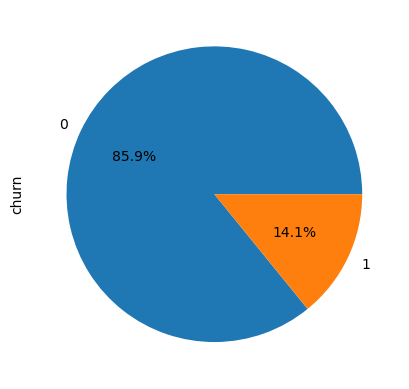

In [29]:
p=data['churn'].value_counts().plot.pie(autopct='%1.1f%%')
p

In [30]:
data['nb_jours_abonne'].mean()

100.27915831663327

In [31]:
data.columns

Index(['nb_jours_abonne', 'duree_appel_jour(minutes)', 'nb_appel_jour',
       'cout_appel_jour', 'duree_appel_soiree(minutes)', 'nb_appel_soiree',
       'cout_appel_soiree', 'duree_appel_nuit(minutes)', 'nb_appel_nuit',
       'cout_appel_nuit', 'duree_appel_inter(minutes)', 'nb_appel_inter',
       'cout_appel_inter', 'active_msg_vocaux', 'nb_msg_vocaux',
       'nb_reclamation', 'churn'],
      dtype='object')

In [32]:
d=data['active_msg_vocaux'][data['active_msg_vocaux']]
d.value_counts()

1    4992
0       8
Name: active_msg_vocaux, dtype: int64

In [33]:
data.isnull().sum()

nb_jours_abonne                0
duree_appel_jour(minutes)      0
nb_appel_jour                  0
cout_appel_jour                0
duree_appel_soiree(minutes)    0
nb_appel_soiree                0
cout_appel_soiree              0
duree_appel_nuit(minutes)      0
nb_appel_nuit                  0
cout_appel_nuit                0
duree_appel_inter(minutes)     0
nb_appel_inter                 0
cout_appel_inter               0
active_msg_vocaux              0
nb_msg_vocaux                  0
nb_reclamation                 0
churn                          0
dtype: int64

we are going to replace the null values of the col 'active_msg_vocaux' with the last values observed

In [34]:
data['active_msg_vocaux'].fillna(method="ffill",inplace=True)

#Logistic regression to find missed chun

In [35]:
data.shape

(5000, 17)

In [36]:
data['churn'].value_counts()

0    4293
1     707
Name: churn, dtype: int64

we are going to replace the null values of the col 'churn' with the most frequent value which is 0

# ML models

In [37]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=1)
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\Wajih\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Wajih\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
x_train_pred=lr.predict(x_train)
print('the accuracy is:',accuracy_score(x_train_pred,y_train))

the accuracy is: 0.85725


In [87]:
x_test_pred=lr.predict(x_test)
print(y_train.value_counts())
#print('the accuracy is:',accuracy_score(x_test_pred,y_test))
confusion_matrix(x_train_pred,y_train)
(y_train).shape

churn
0        3434
1         566
dtype: int64


(4000, 1)

<Axes: >

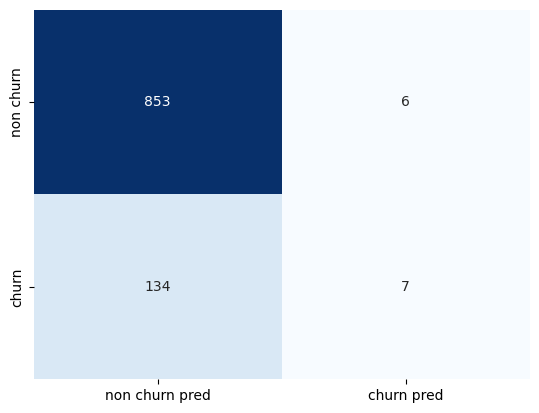

In [88]:
cm=confusion_matrix(y_test,x_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['non churn pred', 'churn pred'], yticklabels=['non churn', 'churn'])

In [89]:
true_labels=y_test
predicted_labels=x_test_pred
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Calculate F1-score
f1 = f1_score(true_labels, predicted_labels)
print("F1-score:", f1)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)
print("Recall:", recall)

# Calculate precision
precision = precision_score(true_labels, predicted_labels)
print("Precision:", precision)

Accuracy: 0.86
F1-score: 0.09090909090909093
Recall: 0.04964539007092199
Precision: 0.5384615384615384


this model didnt work well because from 636 true churn it predict only 37 correctly so we will try to implement the decision tree classifier and compare

In [90]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_x_train_pred=dt.predict(x_train)

it looks good but now we will test with the test data

In [94]:
test_pred=dt.predict(x_test)
cm=confusion_matrix(y_test,test_pred)

In [93]:
true_labels=y_test
predicted_labels=test_pred
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Calculate F1-score
f1 = f1_score(true_labels, predicted_labels)
print("F1-score:", f1)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)
print("Recall:", recall)

# Calculate precision
precision = precision_score(true_labels, predicted_labels)
print("Precision:", precision)

Accuracy: 0.865
F1-score: 0.5573770491803278
Recall: 0.6028368794326241
Precision: 0.5182926829268293


<Axes: >

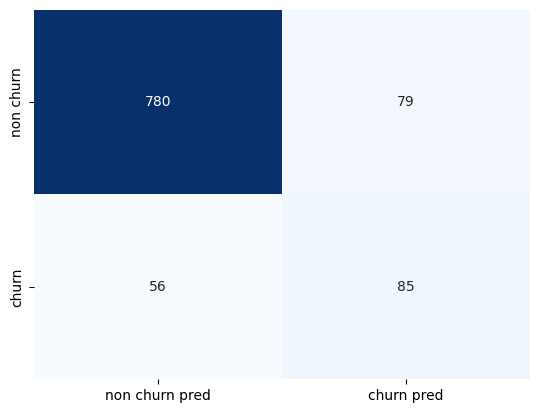

In [92]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['non churn pred', 'churn pred'], yticklabels=['non churn', 'churn'])

its much better , but we will see if we got better,we will try random forests

In [45]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
train_pred=rfc.predict(x_train)
print('accuracy',accuracy_score(train_pred,y_train))
print('confudion matrinx',confusion_matrix(train_pred,y_train))

C:\Users\Wajih\AppData\Local\Temp\ipykernel_11152\3836258313.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


accuracy 0.99975
confudion matrinx [[3434    1]
 [   0  565]]


In [95]:
test_pred2=rfc.predict(x_test)
ccm=confusion_matrix(y_test,test_pred2)

<Axes: >

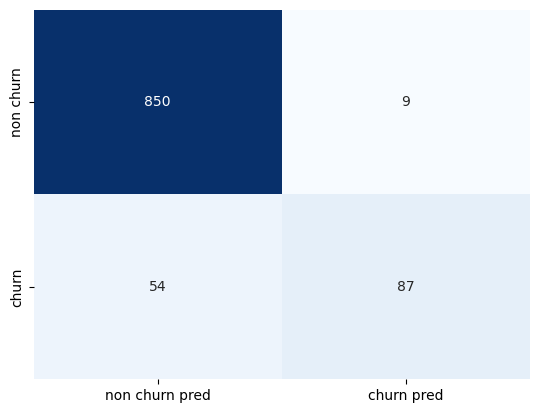

In [96]:
sns.heatmap(ccm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['non churn pred', 'churn pred'], yticklabels=['non churn', 'churn'])

We can identify if a machine learning model has overfit by first evaluating the model on the training dataset and then evaluating the same model on a holdout test dataset.
If the performance of the model on the training dataset is significantly better than the performance on the test dataset, then the model may have overfit the training dataset.

now we will try to standarize the data and see the difference

In [97]:
true_labels=y_test
predicted_labels=test_pred2
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Calculate F1-score
f1 = f1_score(true_labels, predicted_labels)
print("F1-score:", f1)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)
print("Recall:", recall)

# Calculate precision
precision = precision_score(true_labels, predicted_labels)
print("Precision:", precision)

Accuracy: 0.937
F1-score: 0.7341772151898734
Recall: 0.6170212765957447
Precision: 0.90625


In [48]:

std=StandardScaler()
std.fit(data)
std_data = std.transform(data)
std_data=pd.DataFrame(std_data)
std_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.698470,1.573802,0.502493,1.574074,-0.064032,-0.059134,-0.063849,0.876999,-0.443507,0.876286,-0.094809,-0.585107,-0.095509,1.640191,1.273145,-0.437827,-0.405816
1,0.169342,-0.346802,1.156463,-0.347082,-0.101621,0.142421,-0.101089,1.068992,0.156876,1.069818,1.245227,-0.585107,1.245982,1.640191,1.346973,-0.437827,-0.405816
2,0.925239,1.171125,0.703715,1.171286,-1.571562,0.495143,-1.572084,-0.748012,0.206908,-0.746737,0.701969,0.228803,0.695971,-0.599895,-0.572549,-1.203563,-0.405816
3,-0.410179,2.210292,-1.459417,2.210457,-2.744745,-0.613411,-2.745155,-0.069110,-0.543571,-0.069377,-1.326194,1.042712,-1.329681,-0.599895,-0.572549,0.327909,-0.405816
4,-0.636948,-0.252163,0.653409,-0.252116,-1.035419,1.099808,-1.034426,-0.267041,1.057451,-0.267307,-0.058592,-0.585107,-0.055264,-0.599895,-0.572549,1.093645,-0.405816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.266863,1.028239,1.357684,1.028291,0.442435,1.301364,0.443551,1.922073,0.807292,1.923114,-0.131027,0.228803,-0.135754,1.640191,2.380562,0.327909,-0.405816
4996,1.303188,0.072577,-0.503614,0.072079,1.111130,-1.369243,1.111550,0.261434,0.657196,0.260505,1.607399,-0.992061,1.608185,-0.599895,-0.572549,1.093645,2.464170
4997,-0.989700,-0.736489,-0.553920,-0.736771,-0.550715,1.402141,-0.550301,0.237683,-0.143316,0.238513,1.209010,-0.178152,1.205738,-0.599895,-0.572549,-0.437827,-0.405816
4998,0.219735,0.157937,-1.660638,0.158313,-0.572477,-0.411856,-0.573577,0.475200,-0.543571,0.476029,-0.638067,0.635757,-0.632105,-0.599895,-0.572549,-1.203563,-0.405816


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_x_train_pred=dt.predict(x_train)
print('accuracy',accuracy_score(dt_x_train_pred,y_train))
print('confudion matrinx',confusion_matrix(dt_x_train_pred,y_train))
test_pred=dt.predict(x_test)
print('accuracy',accuracy_score(test_pred,y_test))
print('confudion matrinx',confusion_matrix(test_pred,y_test))

accuracy 1.0
confudion matrinx [[3864    0]
 [   0  636]]
accuracy 0.88
confudion matrinx [[392  23]
 [ 37  48]]


rf=RandomForestClassifier()
rf.fit(x_train,y_train)
train_pred=rf.predict(x_train)
print('accuracy',accuracy_score(train_pred,y_train))
print('confudion matrinx',confusion_matrix(train_pred,y_train))
test_pred=rf.predict(x_test)
print('accuracy',accuracy_score(test_pred,y_test))
print('confudion matrinx',confusion_matrix(test_pred,y_test))

now i will predict the output as proba

In [50]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_x_train_pred=dt.predict_proba(x_train)
pd.DataFrame(dt_x_train_pred).value_counts()

0    1  
1.0  0.0    3864
0.0  1.0     636
dtype: int64

In [51]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
dt_x_train_pred=rf.predict_proba(x_train)
pd.DataFrame(dt_x_train_pred).value_counts().shape

C:\Users\Wajih\AppData\Local\Temp\ipykernel_11152\1787552973.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


(76,)

now we will predict the missing data of churn

In [52]:
data.describe()

,nb_jours_abonne,duree_appel_jour(minutes),nb_appel_jour,cout_appel_jour,duree_appel_soiree(minutes),nb_appel_soiree,cout_appel_soiree,duree_appel_nuit(minutes),nb_appel_nuit,cout_appel_nuit,duree_appel_inter(minutes),nb_appel_inter,cout_appel_inter,active_msg_vocaux,nb_msg_vocaux,nb_reclamation,churn
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.279158,180.288900,100.011146,30.649672,200.636560,100.173559,17.054322,200.391620,99.864480,9.017732,10.261780,4.437769,2.771196,0.267800,7.755200,1.571772,0.141400
std,39.691902,53.894699,19.880579,9.162067,50.551309,19.847660,4.296843,50.527789,19.989226,2.273763,2.761396,2.457522,0.745514,0.446456,13.546393,1.306064,0.348469
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,86.000000,7.510000,8.500000,3.000000,2.300000,0.000000,0.000000,1.000000,0.000000
50%,100.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,0.000000,0.000000,1.000000,0.000000
75%,127.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,1.000000,17.000000,2.000000,0.000000
max,243.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,2.000000,52.000000,9.000000,1.000000


In [53]:
ch0=data[data['churn']==0].sample(707)
data2=pd.concat([ch0,data[data['churn']==1]])
data22=data2.sample(1414)
x2=data22.iloc[:,:-1]
y2=data22.iloc[:,-1:]
pred2=lr.predict(x2)
print('accuracy',accuracy_score(y2,pred2))

accuracy 0.521923620933522


In [54]:
data['churn'][data['churn']==2]

Series([], Name: churn, dtype: int32)

In [55]:
data.isnull().sum()

nb_jours_abonne                0
duree_appel_jour(minutes)      0
nb_appel_jour                  0
cout_appel_jour                0
duree_appel_soiree(minutes)    0
nb_appel_soiree                0
cout_appel_soiree              0
duree_appel_nuit(minutes)      0
nb_appel_nuit                  0
cout_appel_nuit                0
duree_appel_inter(minutes)     0
nb_appel_inter                 0
cout_appel_inter               0
active_msg_vocaux              0
nb_msg_vocaux                  0
nb_reclamation                 0
churn                          0
dtype: int64

In [56]:
data[data['churn']==0]['nb_reclamation'].mean()
data[data['churn']==1]['nb_reclamation'].mean()

2.255405618463095

In [57]:
data.columns

Index(['nb_jours_abonne', 'duree_appel_jour(minutes)', 'nb_appel_jour',
       'cout_appel_jour', 'duree_appel_soiree(minutes)', 'nb_appel_soiree',
       'cout_appel_soiree', 'duree_appel_nuit(minutes)', 'nb_appel_nuit',
       'cout_appel_nuit', 'duree_appel_inter(minutes)', 'nb_appel_inter',
       'cout_appel_inter', 'active_msg_vocaux', 'nb_msg_vocaux',
       'nb_reclamation', 'churn'],
      dtype='object')

plots

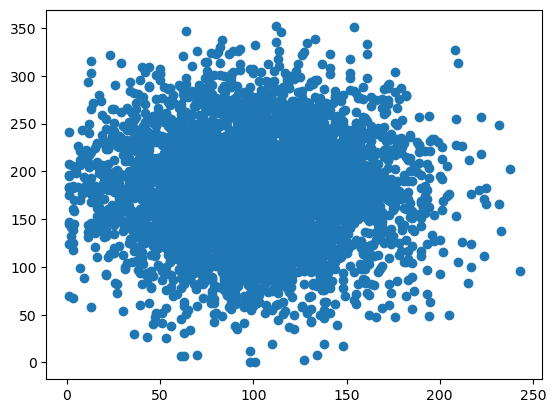

In [58]:
plt.scatter(data['nb_jours_abonne'],data['duree_appel_jour(minutes)'])

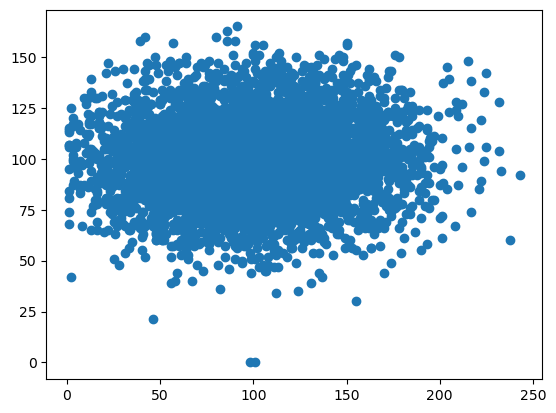

In [59]:
plt.scatter(data['nb_jours_abonne'],data['nb_appel_jour'])

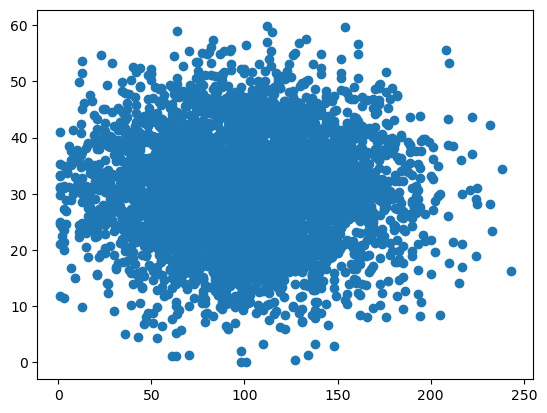

In [60]:
plt.scatter(data['nb_jours_abonne'],data['cout_appel_jour'])

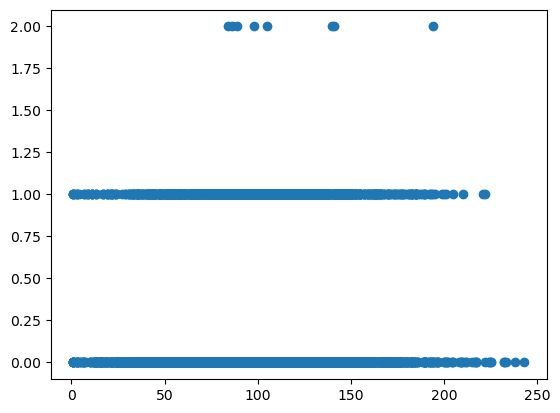

In [61]:
plt.scatter(data['nb_jours_abonne'],data['active_msg_vocaux'])

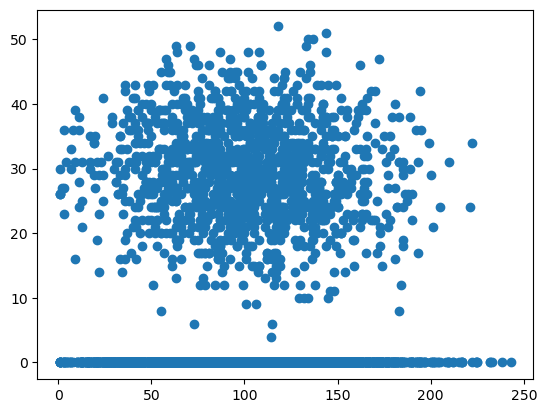

In [62]:
plt.scatter(data['nb_jours_abonne'],data['nb_msg_vocaux'])

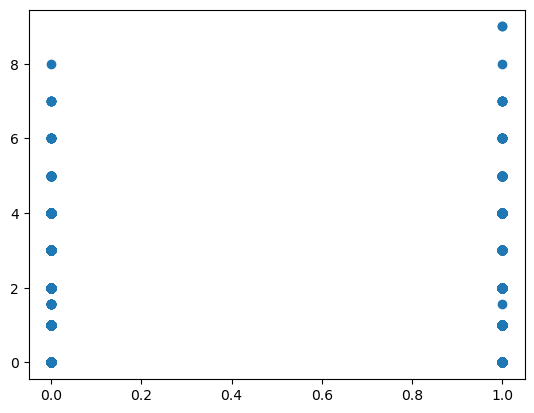

In [63]:
plt.scatter(data['churn'],data['nb_reclamation'])

In [64]:
print('nb_reclamatoin pour churn= false ',data['nb_reclamation'][data['churn']==0].mean())
print('nb_reclamatoin pour churn= true ',data['nb_reclamation'][data['churn']==1].mean())

nb_reclamatoin pour churn= false  1.459186931001046
nb_reclamatoin pour churn= true  2.255405618463095


In [65]:
c=data.corr()
churn_corr=c['churn']
churn_corr

nb_jours_abonne                0.020995
duree_appel_jour(minutes)      0.207705
nb_appel_jour                  0.017586
cout_appel_jour                0.207700
duree_appel_soiree(minutes)    0.089288
nb_appel_soiree               -0.005921
cout_appel_soiree              0.089282
duree_appel_nuit(minutes)      0.045677
nb_appel_nuit                 -0.006547
cout_appel_nuit                0.045673
duree_appel_inter(minutes)     0.063285
nb_appel_inter                -0.046864
cout_appel_inter               0.063275
active_msg_vocaux             -0.109724
nb_msg_vocaux                 -0.097633
nb_reclamation                 0.212438
churn                          1.000000
Name: churn, dtype: float64

In [66]:
data['churn'].value_counts()

0    4293
1     707
Name: churn, dtype: int64